In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

In [63]:
class tornado_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        #self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        #self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        
        #self.dates = dates
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = self.tornado
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.snowstorm
            self.dates = self.natural_disaster['Start']
    def corr(self):
        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of",np.mean(df2["% change"]))
            return(df2.corr())    
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20], c = 'black')
                plt.axvline(axv0[5], c = 'black')
                plt.axvline(axv0[10], c = 'black')
                plt.axvline(axv0[4], c= 'black')
                plt.axvline(axv0[14], c='black')

In [64]:
class hurricane_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        return self.dates

    def corr(self):
        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of",np.mean(df2["% change"]))
            return(df2.corr())
        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[10], c = 'black')
            plt.axvline(axv0[4], c= 'black')
            plt.axvline(axv0[14], c='black')

In [65]:
class snowstorm_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        
        self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
 
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.snowstorm
            self.dates = self.natural_disaster['Start']
        return self.industry

    def corr(self):
        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of",np.mean(df2["% change"]))
            return(df2.corr())
    
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[10], c = 'black')
            plt.axvline(axv0[4], c= 'black')
            plt.axvline(axv0[14], c='black')

In [66]:
snowstorm = snowstorm_dis('Mining', 'Snowstorm')
snowstorm.data()
snowstorm.corr()
#snowstorm.plot()

 Looking at the Mining industry and how it is affected by the natural disaster: Snowstorm ,we analyzed 44 points
 where there was an average percentage change of -0.0005124211918502846


,Open,High,Low,Close,Adj Close,Volume,% change
Open,1.000000,0.999680,0.999435,0.998992,0.870810,0.093088,-0.216097
High,0.999680,1.000000,0.999600,0.999608,0.871795,0.095769,-0.195214
Low,0.999435,0.999600,1.000000,0.999621,0.870701,0.091112,-0.192033
Close,0.998992,0.999608,0.999621,1.000000,0.874059,0.095803,-0.173752
Adj Close,0.870810,0.871795,0.870701,0.874059,1.000000,0.344035,-0.112712
Volume,0.093088,0.095769,0.091112,0.095803,0.344035,1.000000,0.000913
% change,-0.216097,-0.195214,-0.192033,-0.173752,-0.112712,0.000913,1.000000


In [67]:
snowstorm.corr()

 Looking at the Mining industry and how it is affected by the natural disaster: Snowstorm ,we analyzed 44 points
 where there was an average percentage change of -0.0005124211918502846


,Open,High,Low,Close,Adj Close,Volume,% change
Open,1.000000,0.999680,0.999435,0.998992,0.870810,0.093088,-0.216097
High,0.999680,1.000000,0.999600,0.999608,0.871795,0.095769,-0.195214
Low,0.999435,0.999600,1.000000,0.999621,0.870701,0.091112,-0.192033
Close,0.998992,0.999608,0.999621,1.000000,0.874059,0.095803,-0.173752
Adj Close,0.870810,0.871795,0.870701,0.874059,1.000000,0.344035,-0.112712
Volume,0.093088,0.095769,0.091112,0.095803,0.344035,1.000000,0.000913
% change,-0.216097,-0.195214,-0.192033,-0.173752,-0.112712,0.000913,1.000000


C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


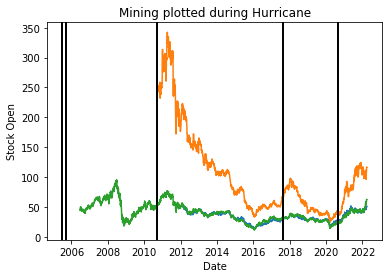

In [68]:
hurricane = hurricane_dis('Mining', 'Hurricane')
hurricane.data()
hurricane.plot()

In [84]:
def f3(Industry, Natural_Disaster):
    if Natural_Disaster == "Hurricane":
        hurricane = hurricane_dis(Industry, Natural_Disaster)
        hurricane.data()
        corr = hurricane.corr()
        plot = hurricane.plot()
    print(corr)
    return plot

 Looking at the Mining industry and how it is affected by the natural disaster: Hurricane ,we analyzed 7 points
 where there was an average percentage change of -0.005040403915534815


C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999937  0.999748  0.999639   0.847625 -0.392614   
High       0.999937  1.000000  0.999781  0.999834   0.849275 -0.394883   
Low        0.999748  0.999781  1.000000  0.999824   0.851949 -0.382365   
Close      0.999639  0.999834  0.999824  1.000000   0.852704 -0.390150   
Adj Close  0.847625  0.849275  0.851949  0.852704   1.000000  0.050970   
Volume    -0.392614 -0.394883 -0.382365 -0.390150   0.050970  1.000000   
% change  -0.611998 -0.603795 -0.601439 -0.591044  -0.416343  0.162142   

           % change  
Open      -0.611998  
High      -0.603795  
Low       -0.601439  
Close     -0.591044  
Adj Close -0.416343  
Volume     0.162142  
% change   1.000000  


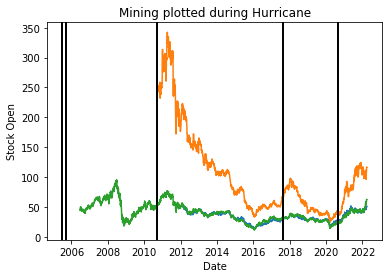

In [86]:
f3('Mining', 'Hurricane')